Data shape: (109, 91)


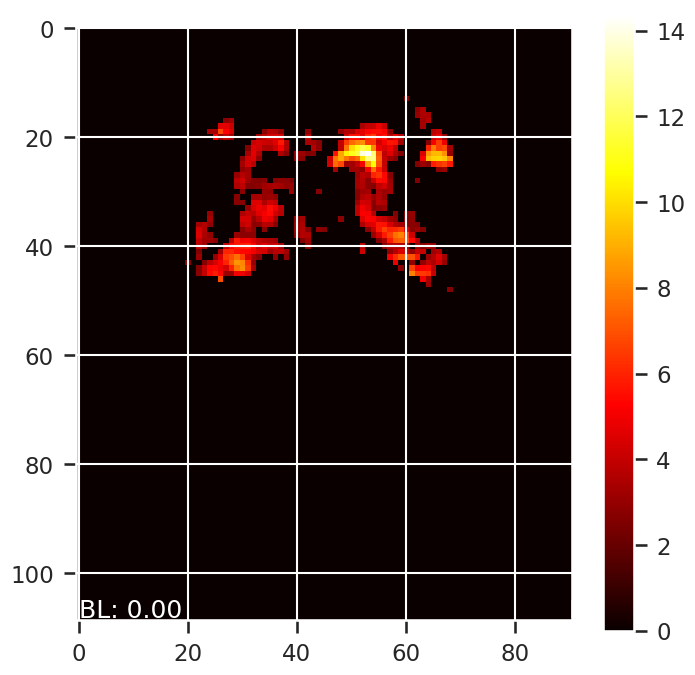

In [50]:
# check orientation for imshow

# Print array shape
print("Data shape:", func_data.shape)

# Plot with sample values marked
plt.figure(figsize=(8,8))
plt.imshow(func_data, cmap='hot')

# Add text to show actual values at corners
plt.text(0, 0, f'TL: {func_data[0,0]:.2f}', color='white')  
plt.text(0, func_data.shape[0]-1, f'BL: {func_data[-1,0]:.2f}', color='white')
plt.text(func_data.shape[1]-1, 0, f'TR: {func_data[0,-1]:.2f}', color='white')
plt.text(func_data.shape[1]-1, func_data.shape[0]-1, f'BR: {func_data[-1,-1]:.2f}', color='white')

plt.colorbar()
plt.show()

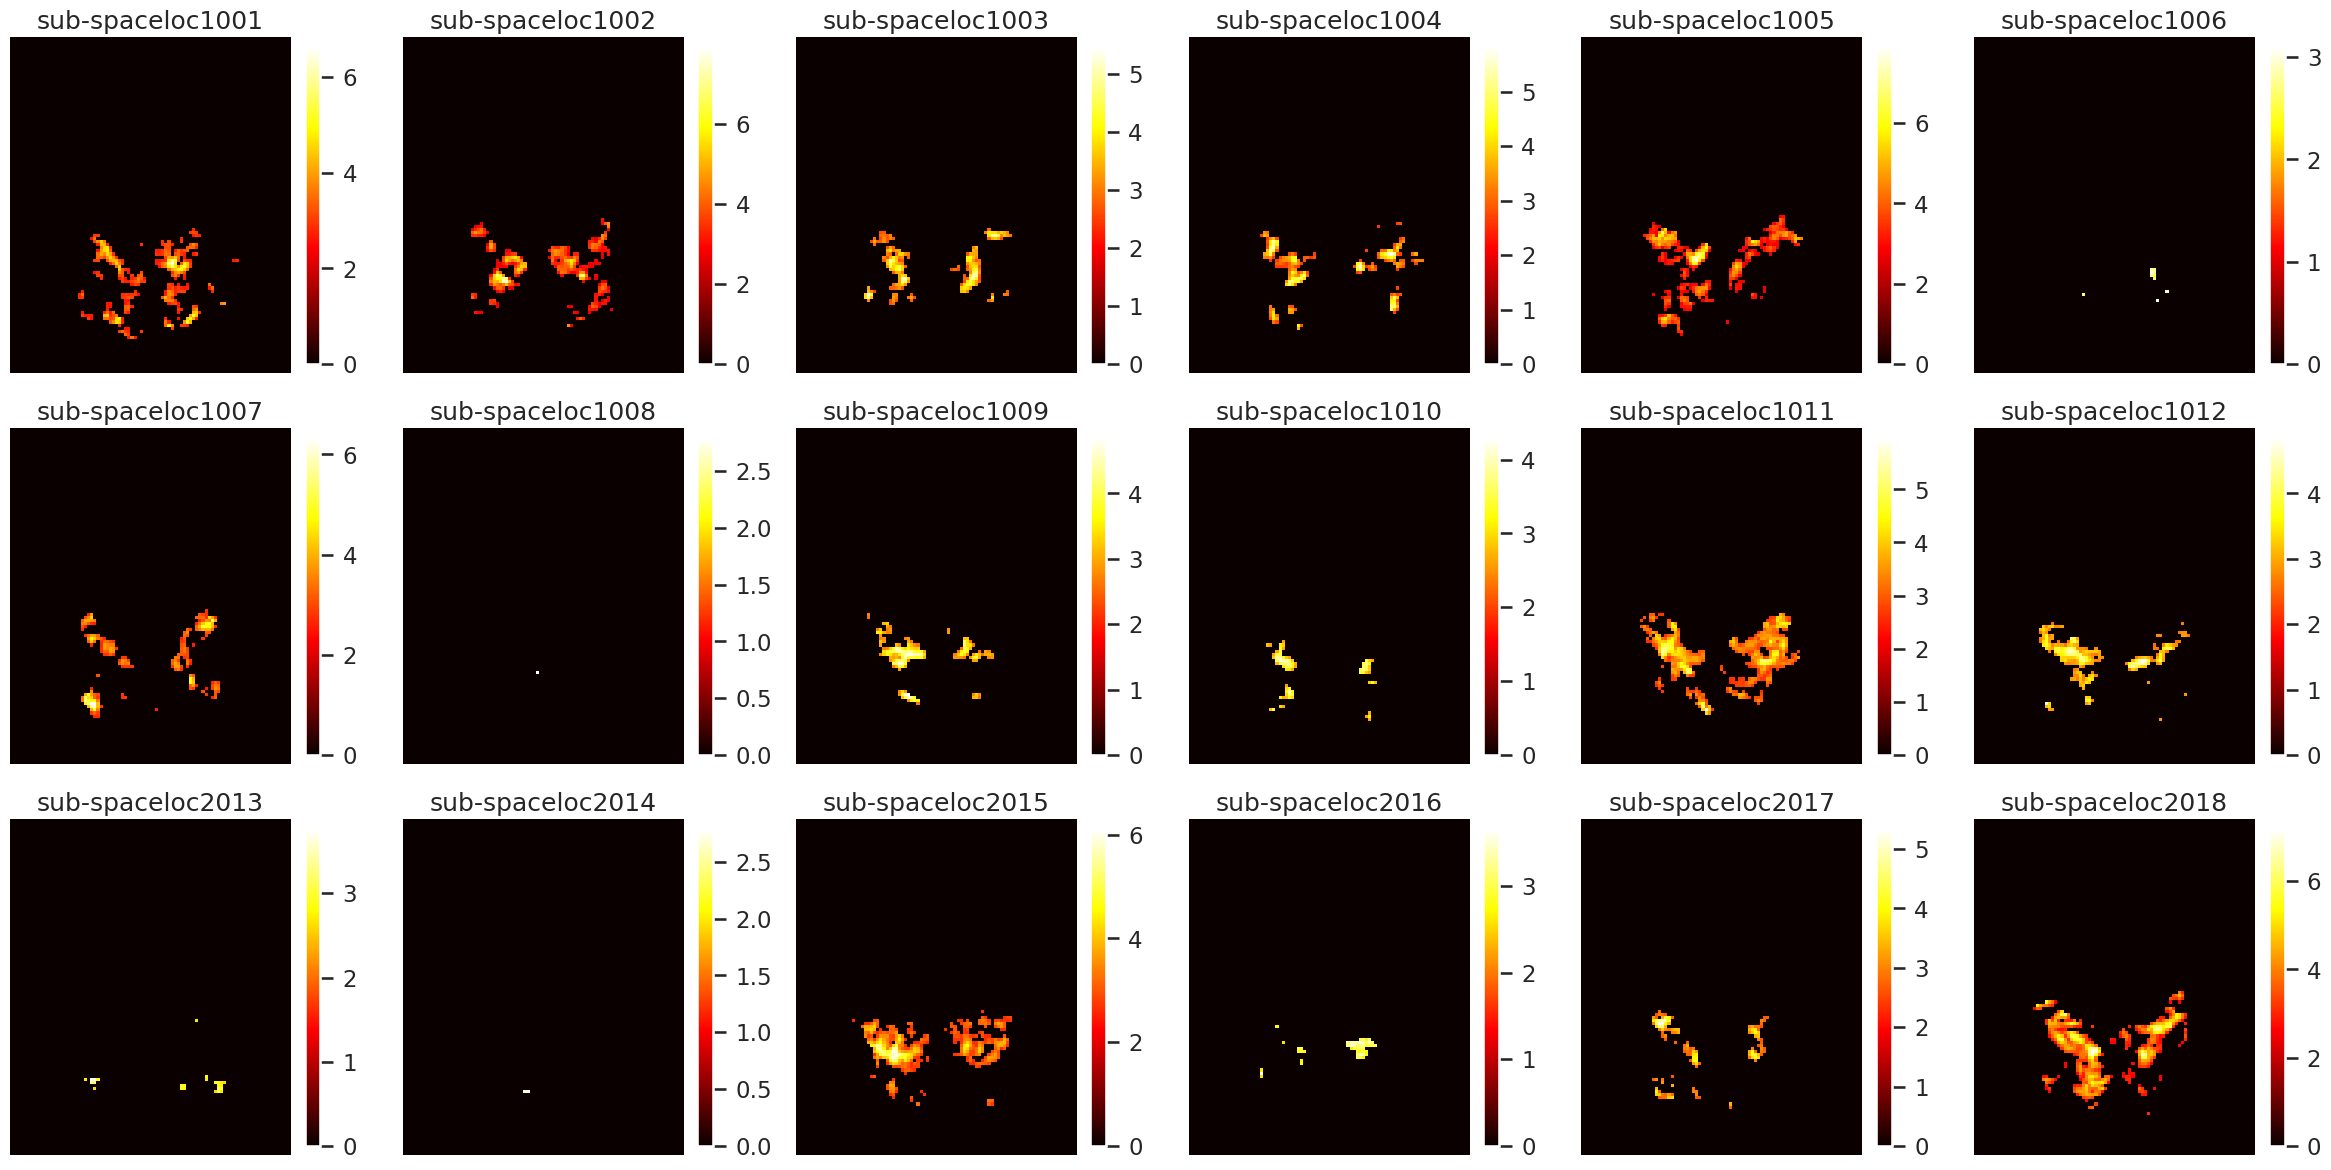

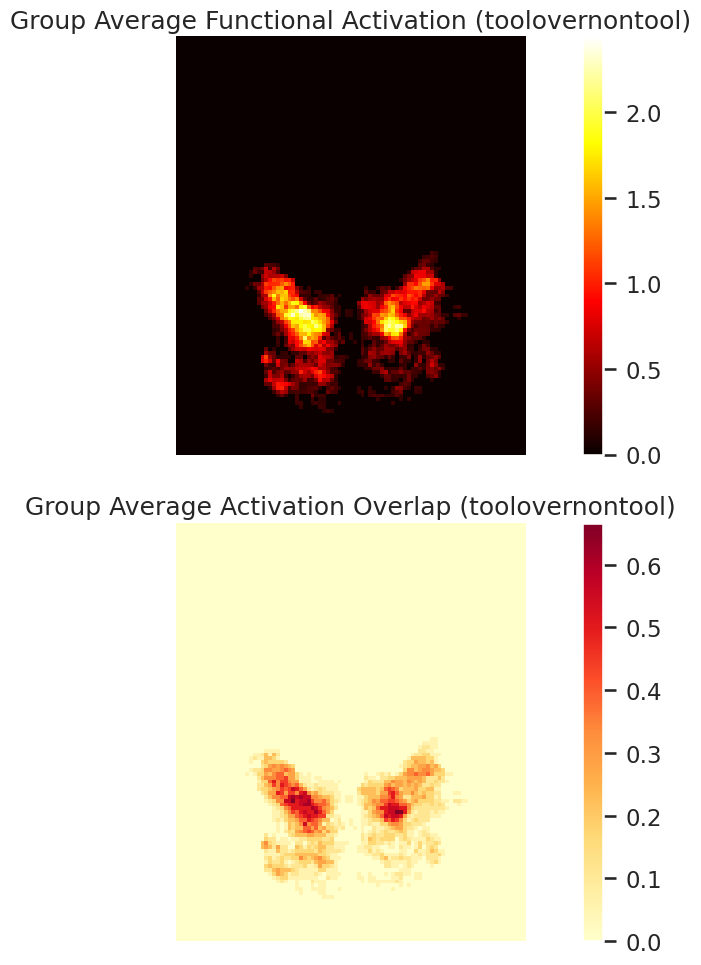

In [57]:
# Plot heatmap for tools over nontools to compare to tools over scramble.
'''
Plot 2D heatmap of activation for each subject and group average 
'''

import sys
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask
import nibabel as nib
import os
import ptoc_params as params
import warnings
warnings.filterwarnings("ignore")
import sys
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask
import nibabel as nib
import os
import ptoc_params as params
import warnings
warnings.filterwarnings("ignore")

# Paths and parameters
raw_dir = params.raw_dir
results_dir = params.results_dir
fig_dir = params.fig_dir
sub_info = params.sub_info_tool[params.sub_info_tool['exp'] == 'spaceloc']
thresh = params.thresh
suf = params.suf
roi_dir = params.roi_dir

plt.style.use('seaborn')
sns.set_context("talk")

all_func_data = []
all_binary_data = []

# Individual subject plots (3x6 grid)
fig_individual = plt.figure(figsize=(24, 12))

for idx, sub in enumerate(sub_info['sub']):
  sub_dir = f"{raw_dir}/{sub}/ses-01"
  neural_map_dir = f"{sub_dir}/derivatives/neural_map"
  
  func_path = f"{neural_map_dir}/toolovernontool_func.npy"
  binary_path = f"{neural_map_dir}/toolovernontool_binary.npy"
  
  if os.path.exists(func_path) and os.path.exists(binary_path):
      func_data = np.load(func_path)
      binary_data = np.load(binary_path)
      
      all_func_data.append(func_data)
      all_binary_data.append(binary_data)
      
      ax = fig_individual.add_subplot(3, 6, idx + 1)
      im = ax.imshow(np.fliplr(func_data), cmap='hot', interpolation='nearest', origin='lower')
      ax.set_title(f"{sub}")
      ax.axis('off')
      plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()

if all_func_data:
  avg_func = np.mean(all_func_data, axis=0)
  avg_binary = np.mean(all_binary_data, axis=0)
  
  fig_group = plt.figure(figsize=(15, 10))
  
  ax1 = plt.subplot(211)
  im1 = ax1.imshow(np.fliplr(avg_func), cmap='hot', interpolation='nearest', origin='lower')
  ax1.set_title('Group Average Functional Activation (toolovernontool)')
  plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
  ax1.axis('off')
  
  ax2 = plt.subplot(212)
  im2 = ax2.imshow(np.fliplr(avg_binary), cmap='YlOrRd', interpolation='nearest', origin='lower')
  ax2.set_title('Group Average Activation Overlap (toolovernontool)')
  plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
  ax2.axis('off')
  
  plt.tight_layout()

plt.show()

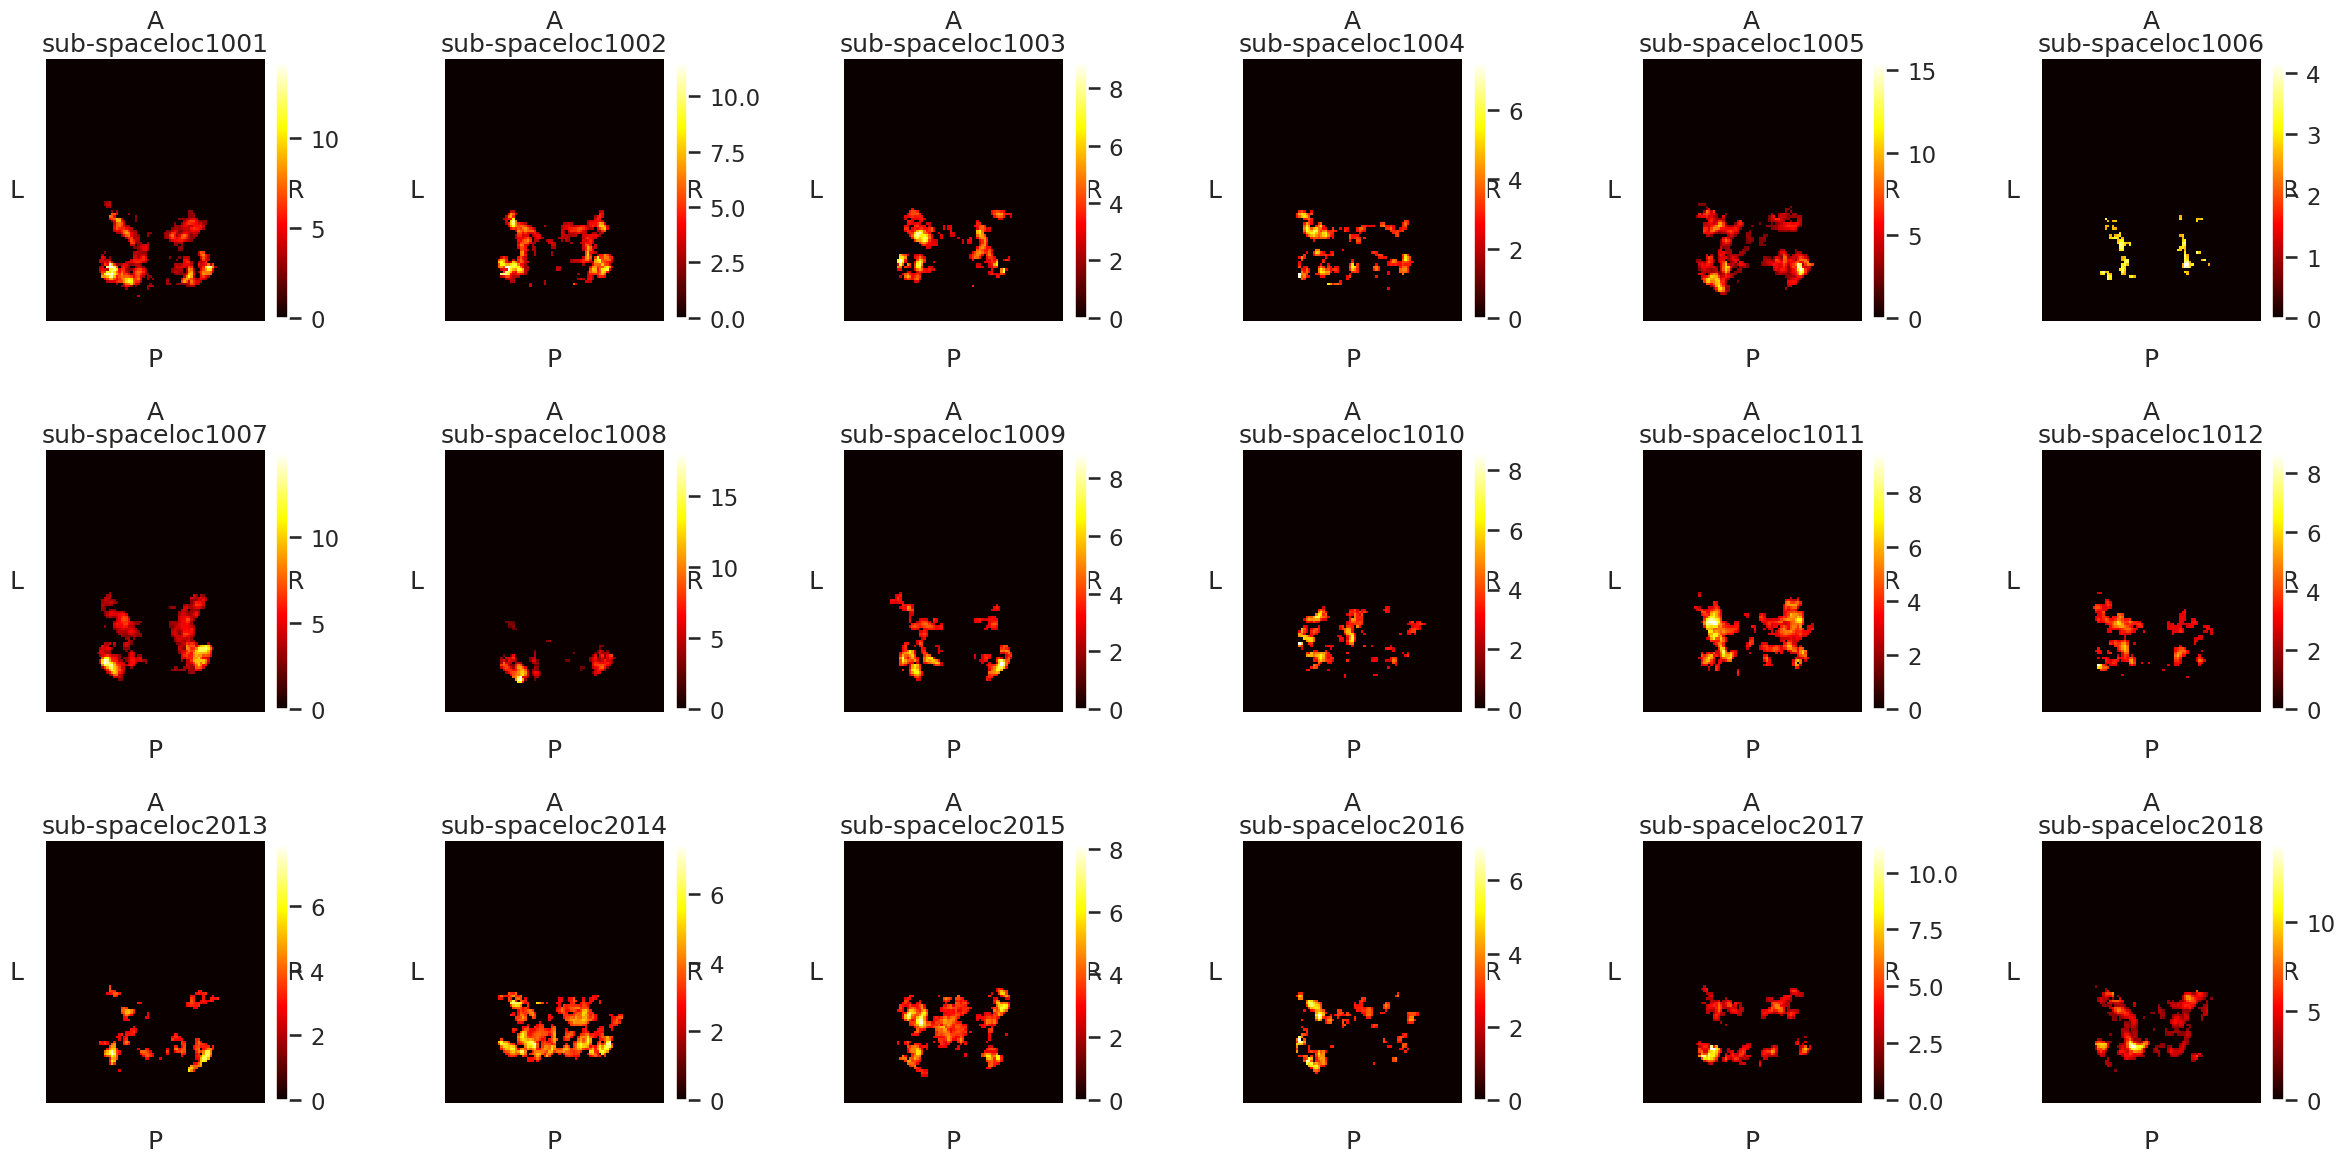

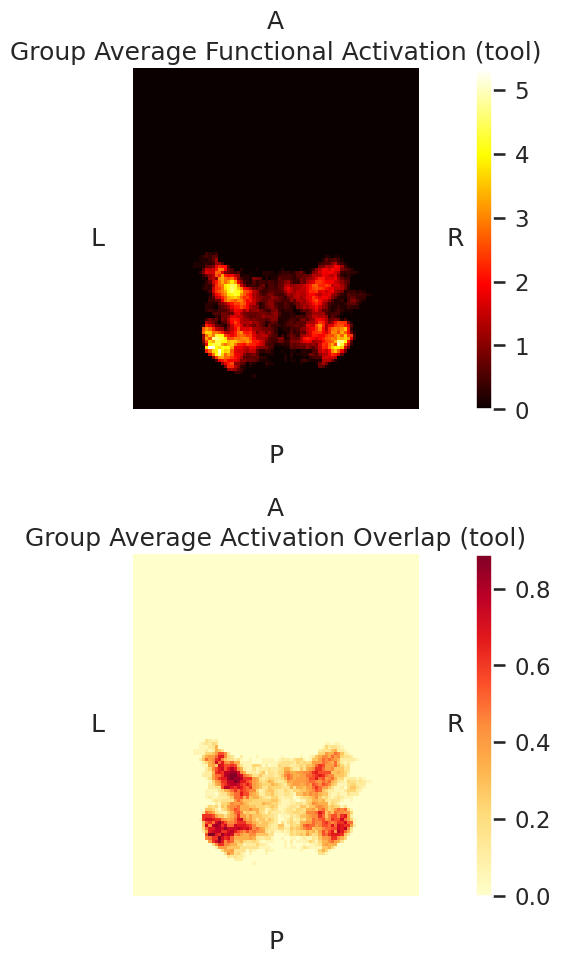

In [56]:
# plot 2D heat map of activation for each subject and group average TOOLS

'''
Plot 2D heatmap of activation for each subject and group average
'''


import sys
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask
import nibabel as nib
import os
import ptoc_params as params
import warnings
warnings.filterwarnings("ignore")

# Paths and parameters
raw_dir = params.raw_dir
results_dir = params.results_dir
fig_dir = params.fig_dir
sub_info = params.sub_info_tool[params.sub_info_tool['exp'] == 'spaceloc']
thresh = params.thresh
suf = params.suf
roi_dir = params.roi_dir

def add_orientation_markers(ax):
  ax.text(-0.1, 0.5, 'L', transform=ax.transAxes, ha='right', va='center')
  ax.text(1.1, 0.5, 'R', transform=ax.transAxes, ha='left', va='center')
  ax.text(0.5, -0.1, 'P', transform=ax.transAxes, ha='center', va='top')
  ax.text(0.5, 1.1, 'A', transform=ax.transAxes, ha='center', va='bottom')

plt.style.use('seaborn')
sns.set_context("talk")

all_func_data = []
all_binary_data = []

# Individual subject plots (3x6 grid)
fig_individual = plt.figure(figsize=(24, 12))

for idx, sub in enumerate(sub_info['sub']):
  sub_dir = f"{raw_dir}/{sub}/ses-01"
  neural_map_dir = f"{sub_dir}/derivatives/neural_map"
  
  func_path = f"{neural_map_dir}/tool_func.npy"
  binary_path = f"{neural_map_dir}/tool_binary.npy"
  
  if os.path.exists(func_path) and os.path.exists(binary_path):
      func_data = np.load(func_path)
      binary_data = np.load(binary_path)
      
      all_func_data.append(func_data)
      all_binary_data.append(binary_data)
      
      ax = fig_individual.add_subplot(3, 6, idx + 1)
      im = ax.imshow(np.fliplr(func_data), cmap='hot', interpolation='nearest', origin='lower')
      add_orientation_markers(ax)
      ax.set_title(f"{sub}")
      ax.axis('off')
      plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()

if all_func_data:
  avg_func = np.mean(all_func_data, axis=0)
  avg_binary = np.mean(all_binary_data, axis=0)
  
  fig_group = plt.figure(figsize=(15, 10))
  
  ax1 = plt.subplot(211)
  im1 = ax1.imshow(np.fliplr(avg_func), cmap='hot', interpolation='nearest', origin='lower')
  add_orientation_markers(ax1)
  ax1.set_title('Group Average Functional Activation (tool)')
  plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
  ax1.axis('off')
  
  ax2 = plt.subplot(212)
  im2 = ax2.imshow(np.fliplr(avg_binary), cmap='YlOrRd', interpolation='nearest', origin='lower')
  add_orientation_markers(ax2)
  ax2.set_title('Group Average Activation Overlap (tool)')
  plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
  ax2.axis('off')
  
  plt.tight_layout()

plt.show()

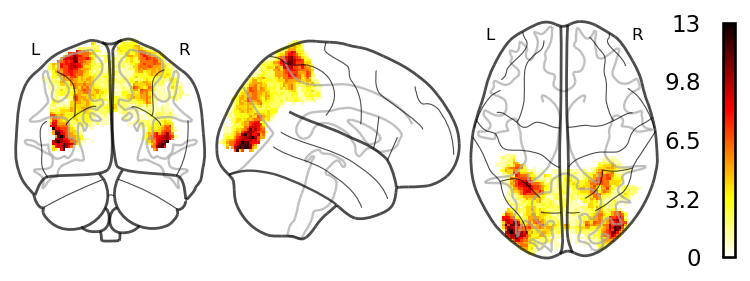

In [36]:
# statistical map
import numpy as np
import nibabel as nib
from nilearn import plotting

# Load and combine all subjects' 3D data
binary_list = []
for sub in sub_info['sub']:
    sub_dir = f'{raw_dir}/{sub}/ses-01'
    neural_map_path = f'{sub_dir}/derivatives/neural_map/tool_binary_3d.npy'
    
    if os.path.exists(neural_map_path):
        binary_map = np.load(neural_map_path)
        binary_list.append(binary_map)

# Create group map by summing across subjects
group_map = np.nansum(binary_list, axis=0)

# Get affine/header from first subject
first_sub = sub_info['sub'].iloc[0]
zstat_reg = image.load_img(f'{raw_dir}/{first_sub}/ses-01/derivatives/fsl/toolloc/HighLevel{suf}.gfeat/cope3.feat/stats/zstat1_reg.nii.gz')

# Create and display group map
nii_img = nib.Nifti1Image(group_map, zstat_reg.affine, zstat_reg.header)
display = plotting.plot_glass_brain(nii_img,
                                  display_mode='ortho',
                                  colorbar=True)
plt.show()

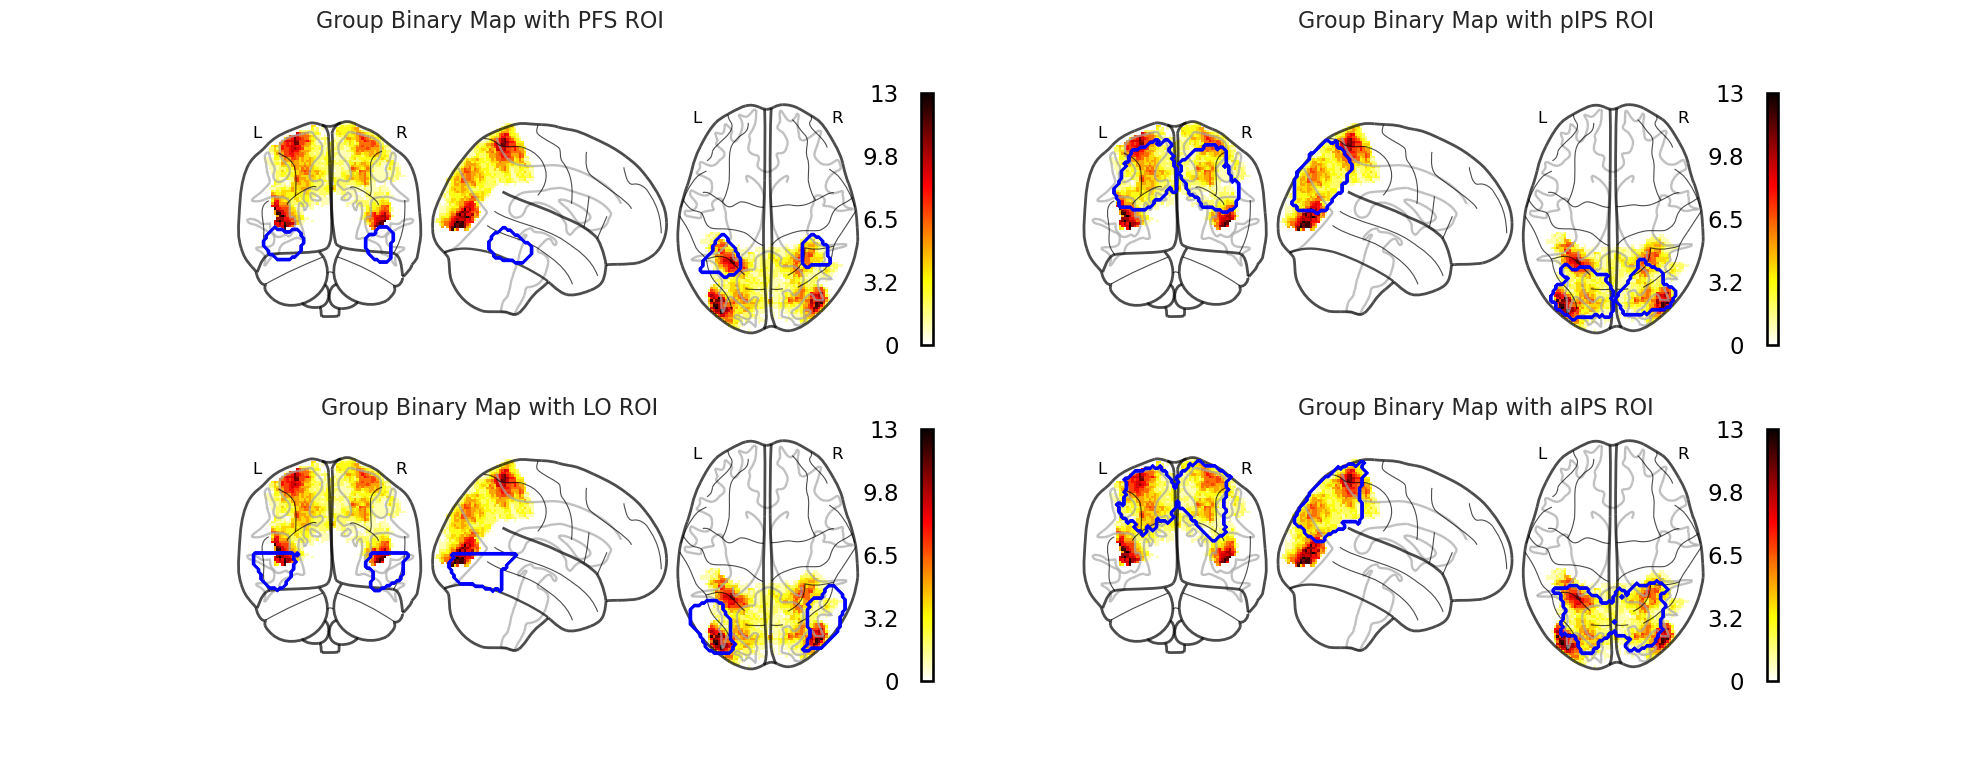

In [59]:
# statistical map with roi outlines
import numpy as np
import nibabel as nib
from nilearn import plotting, image
import matplotlib.pyplot as plt

# Load and combine binary maps
binary_list = []
for sub in sub_info['sub']:
    neural_map_path = f'{raw_dir}/{sub}/ses-01/derivatives/neural_map/tool_binary_3d.npy'
    if os.path.exists(neural_map_path):
        binary_list.append(np.load(neural_map_path))

# Create group map
group_map = np.nansum(binary_list, axis=0)

# Get affine/header from reference image
first_sub = sub_info['sub'].iloc[0]
zstat_reg = image.load_img(f'{raw_dir}/{first_sub}/ses-01/derivatives/fsl/toolloc/HighLevel{suf}.gfeat/cope3.feat/stats/zstat1_reg.nii.gz')

# Create NIfTI image
nii_img = nib.Nifti1Image(group_map, zstat_reg.affine, zstat_reg.header)

# Define ROIs and create visualization
rois = ['PFS', 'pIPS', 'LO', 'aIPS']
roi_dir = '/user_data/csimmon2/git_repos/ptoc/roiParcels'

# Create 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes_flat = axes.flatten()

# Plot each ROI
for idx, roi in enumerate(rois):
    roi_path = f'{roi_dir}/{roi}.nii.gz'
    
    display = plotting.plot_glass_brain(
        nii_img,
        display_mode='ortho',
        colorbar=True,
        axes=axes_flat[idx]
    )
    
    display.add_contours(roi_path, colors='blue', linewidths=1)
    axes_flat[idx].title.set_text(f'Group Binary Map with {roi} ROI')
    axes_flat[idx].title.set_fontsize(16)

plt.tight_layout()
plt.show()

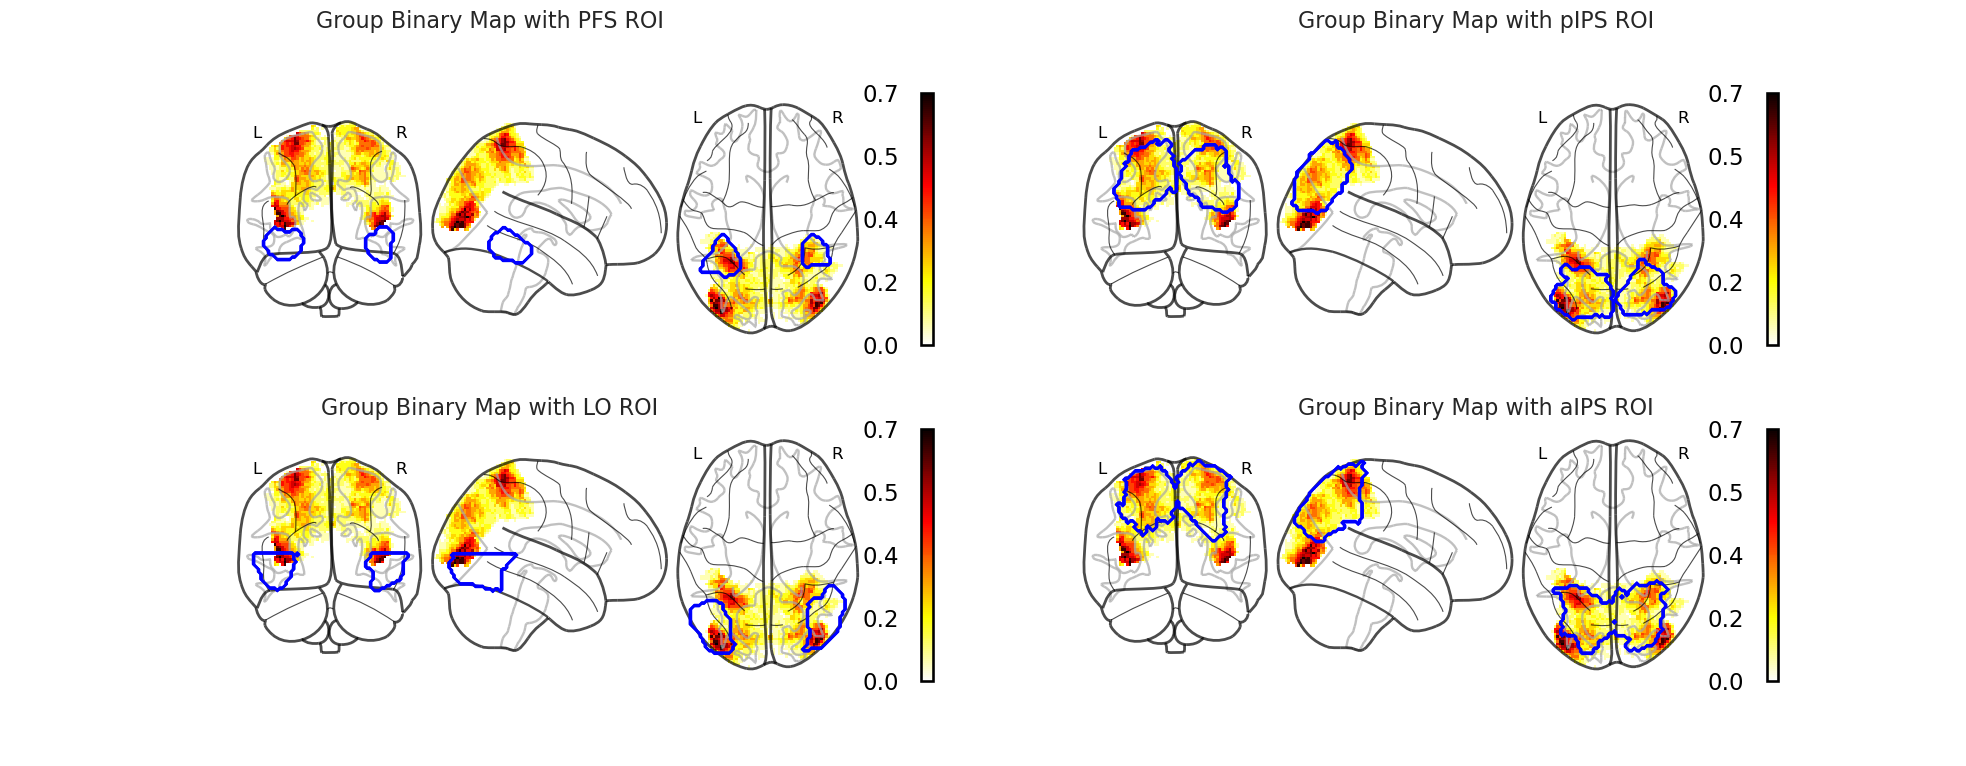

In [64]:
# statistical map with roi outline
import numpy as np
import nibabel as nib
from nilearn import plotting, image
import matplotlib.pyplot as plt

# Load and combine binary maps
binary_list = []
for sub in sub_info['sub']:
    neural_map_path = f'{raw_dir}/{sub}/ses-01/derivatives/neural_map/tool_binary_3d.npy'
    if os.path.exists(neural_map_path):
        binary_list.append(np.load(neural_map_path))

# Create group map and normalize by number of subjects
group_map = np.nansum(binary_list, axis=0)
n_subjects = len(binary_list)
group_map = group_map / n_subjects  # Convert to proportion

# Get affine/header from reference image
first_sub = sub_info['sub'].iloc[0]
zstat_reg = image.load_img(f'{raw_dir}/{first_sub}/ses-01/derivatives/fsl/toolloc/HighLevel{suf}.gfeat/cope3.feat/stats/zstat1_reg.nii.gz')

# Create NIfTI image
nii_img = nib.Nifti1Image(group_map, zstat_reg.affine, zstat_reg.header)

# Define ROIs and create visualization
rois = ['PFS', 'pIPS', 'LO', 'aIPS']
roi_dir = '/user_data/csimmon2/git_repos/ptoc/roiParcels'

# Create 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes_flat = axes.flatten()

# Plot each ROI
for idx, roi in enumerate(rois):
    roi_path = f'{roi_dir}/{roi}.nii.gz'
    
    display = plotting.plot_glass_brain(
        nii_img,
        display_mode='ortho',
        colorbar=True,
        axes=axes_flat[idx],
        cbar_tick_format='%.1f'
    )
    
    display.add_contours(roi_path, colors='blue', linewidths=1)
    axes_flat[idx].title.set_text(f'Group Binary Map with {roi} ROI')
    axes_flat[idx].title.set_fontsize(16)

plt.tight_layout()
plt.show()

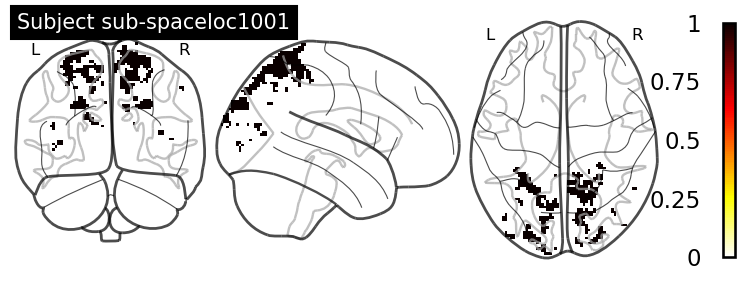

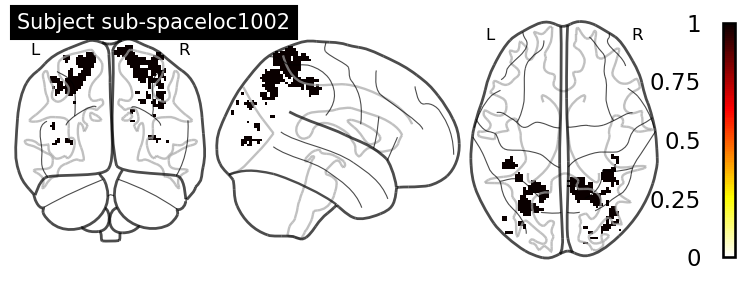

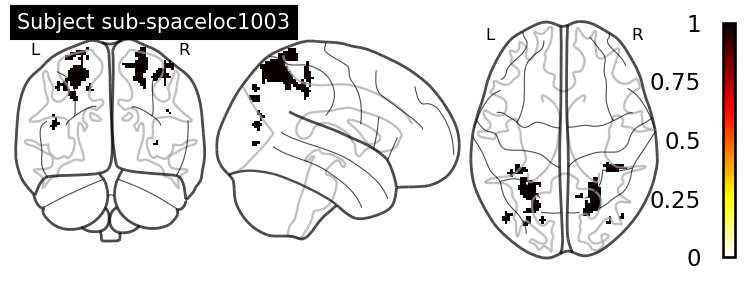

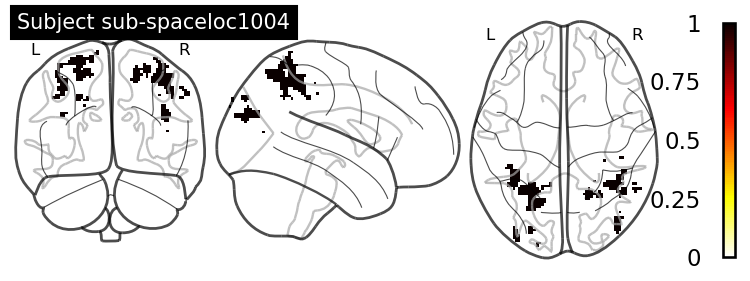

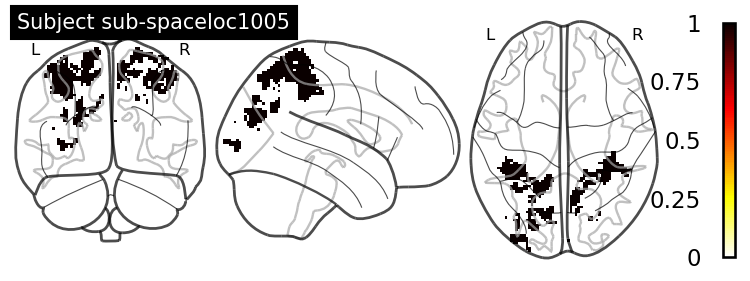

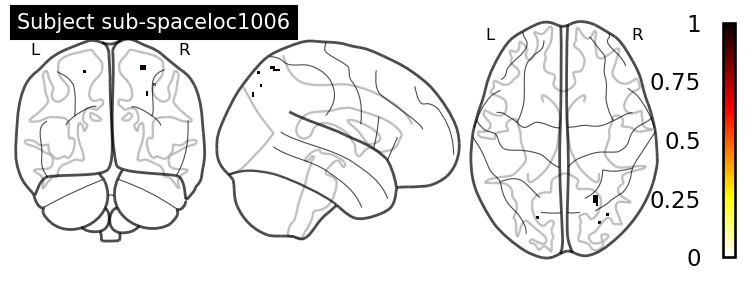

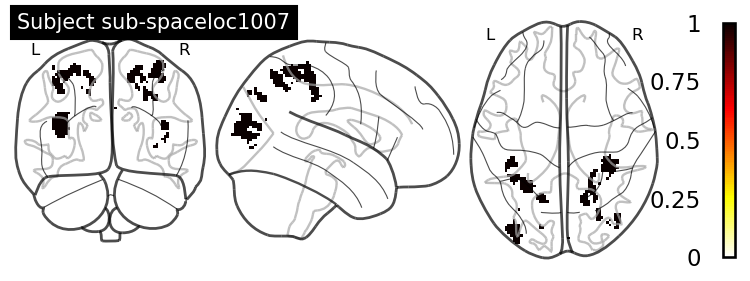

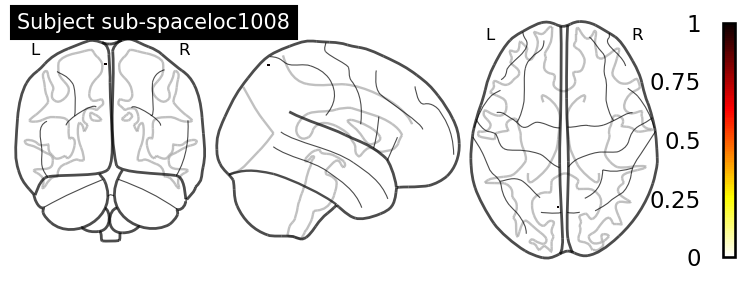

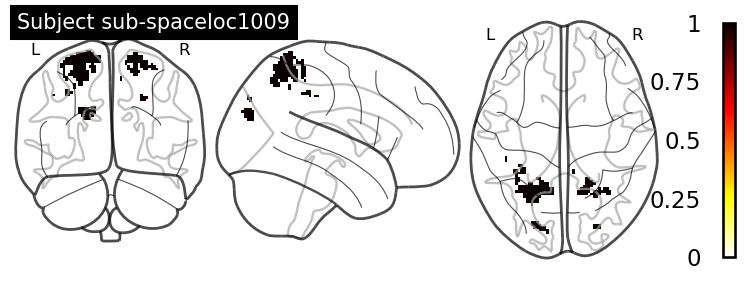

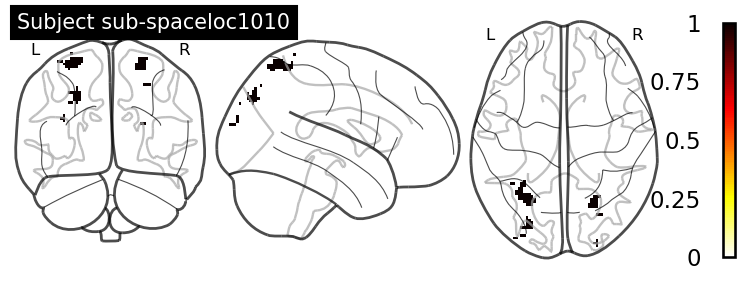

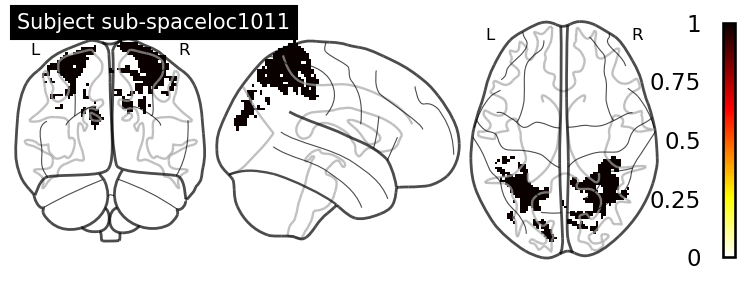

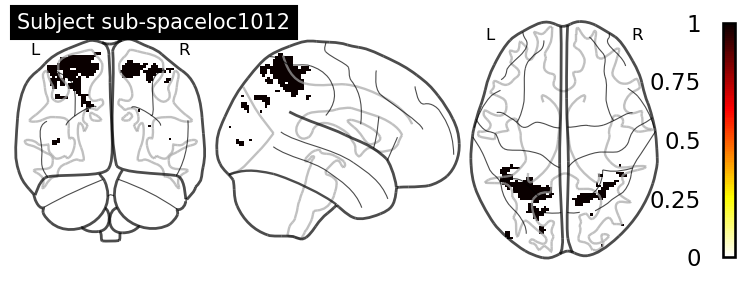

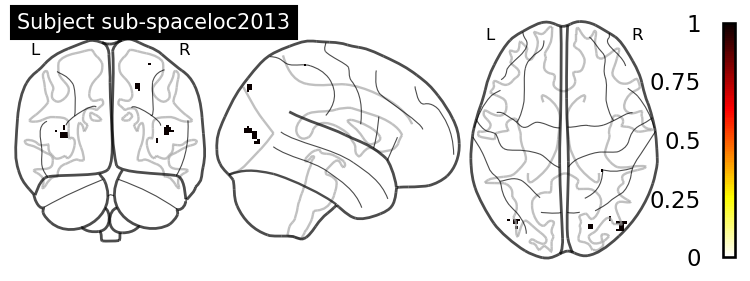

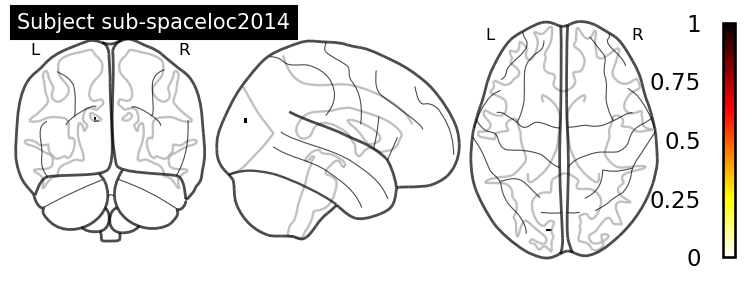

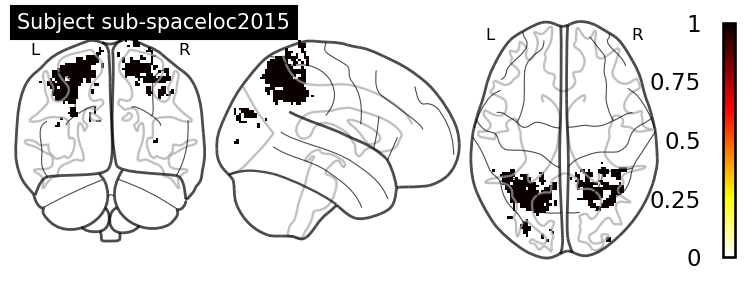

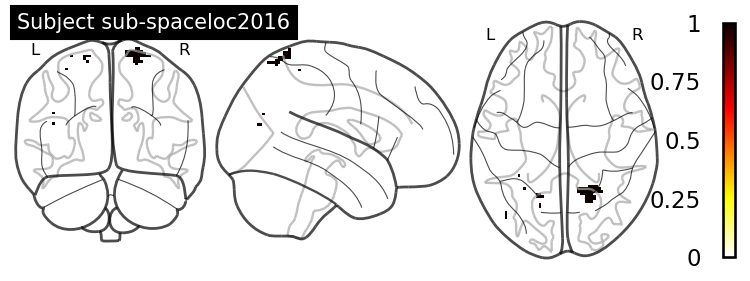

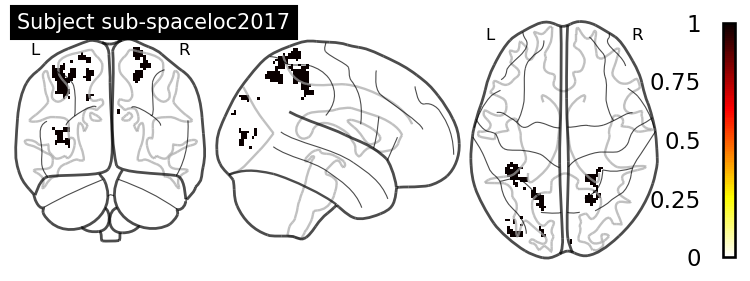

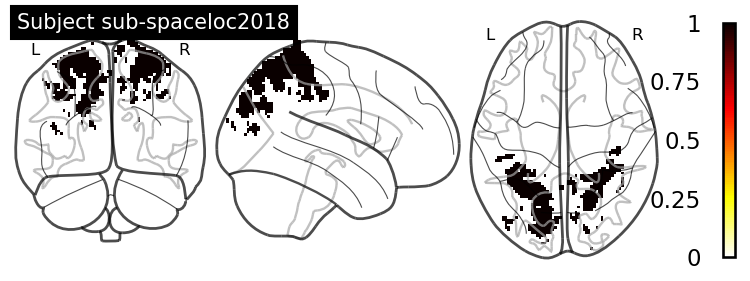

In [31]:
# plot vlad's tools over nontools cope - 1 = voxel activation for one subject, it's binary. 
import numpy as np
import nibabel as nib
from nilearn import plotting

# Get reference affine/header
first_sub = sub_info['sub'].iloc[0]
zstat_reg = image.load_img(f'{raw_dir}/{first_sub}/ses-01/derivatives/fsl/toolloc/HighLevel{suf}.gfeat/cope1.feat/stats/zstat1_reg.nii.gz')

for idx, sub in enumerate(sub_info['sub']):
   sub_dir = f'{raw_dir}/{sub}/ses-01'
   neural_map_path = f'{sub_dir}/derivatives/neural_map/toolovernontool_binary_3d.npy'
   
   if os.path.exists(neural_map_path):
       binary_map = np.load(neural_map_path)
       nii_img = nib.Nifti1Image(binary_map, zstat_reg.affine, zstat_reg.header)
       
       display = plotting.plot_glass_brain(nii_img,
                                         display_mode='ortho',
                                         colorbar=True,
                                         title=f'Subject {sub}')
       plt.show()

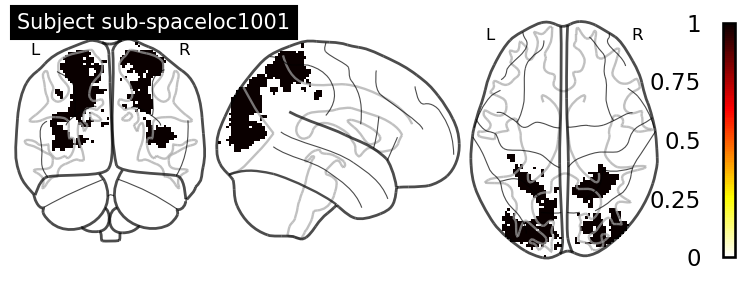

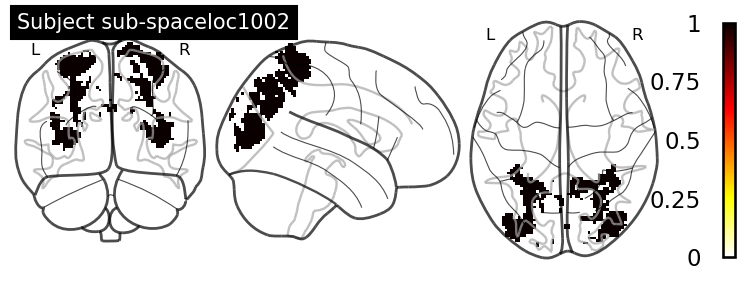

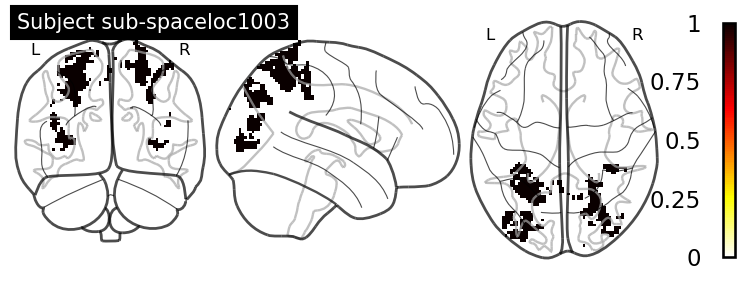

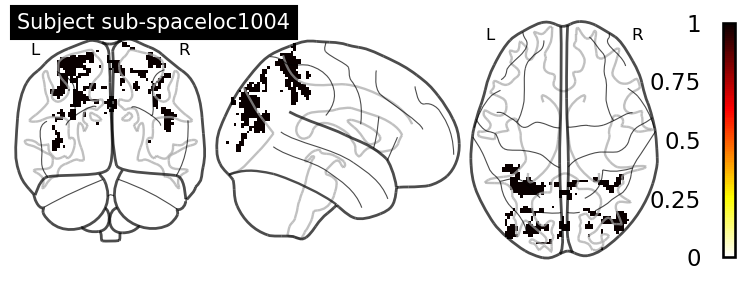

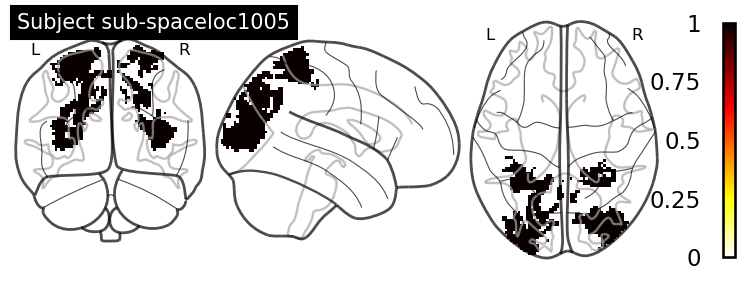

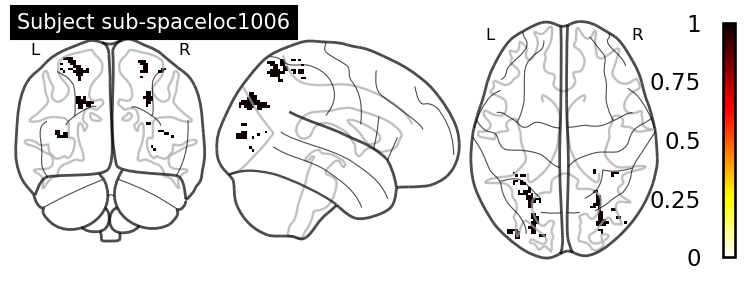

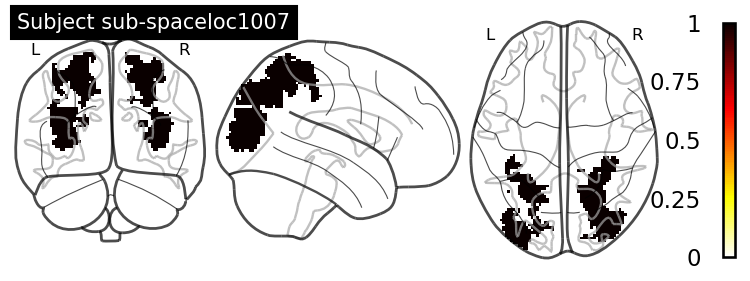

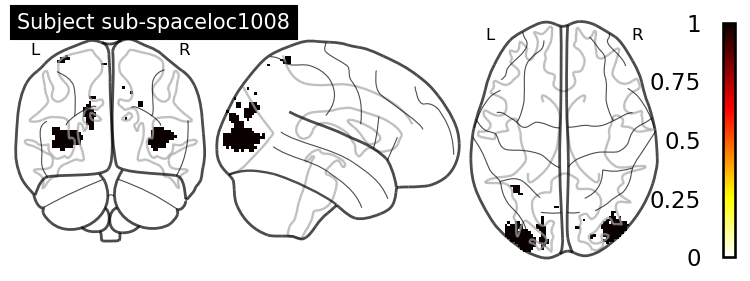

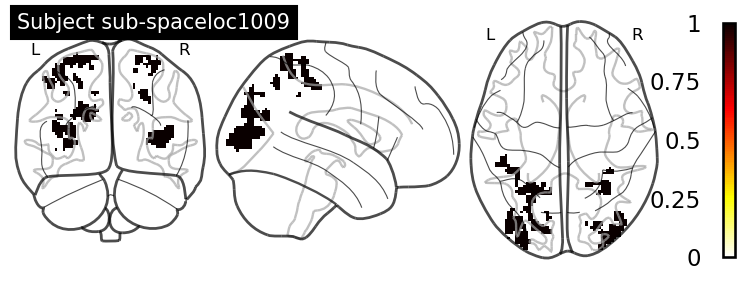

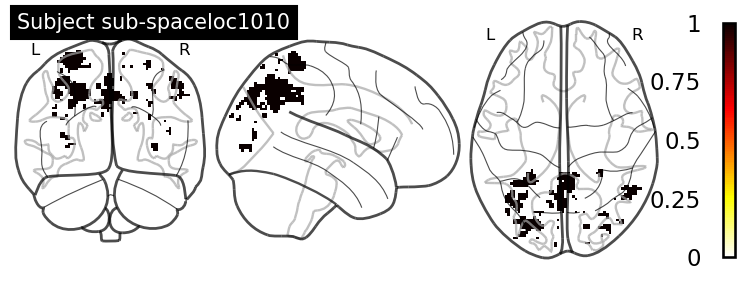

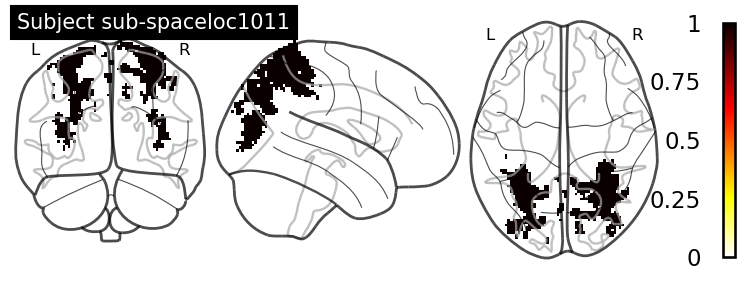

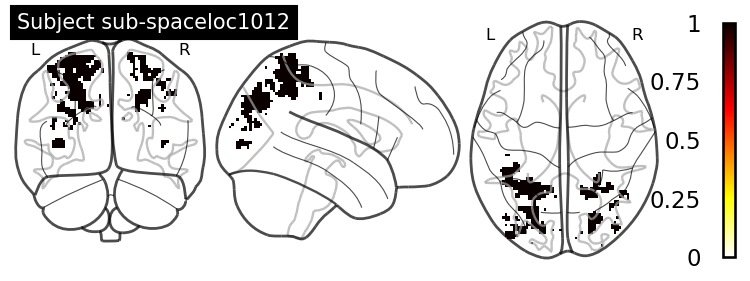

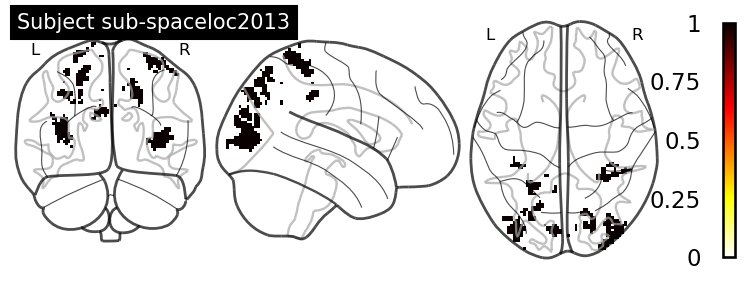

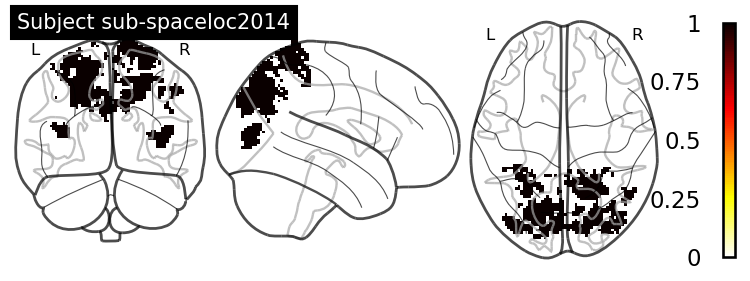

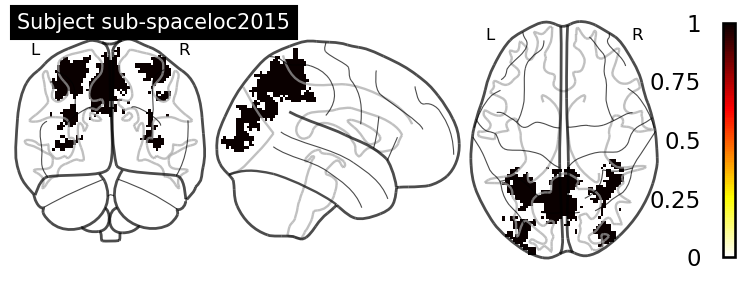

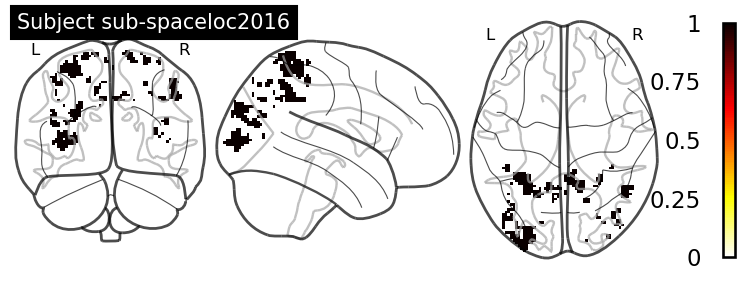

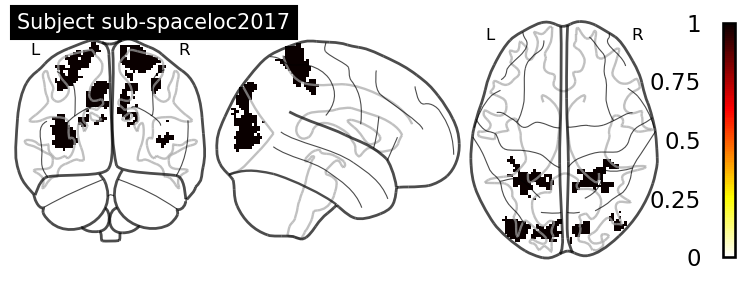

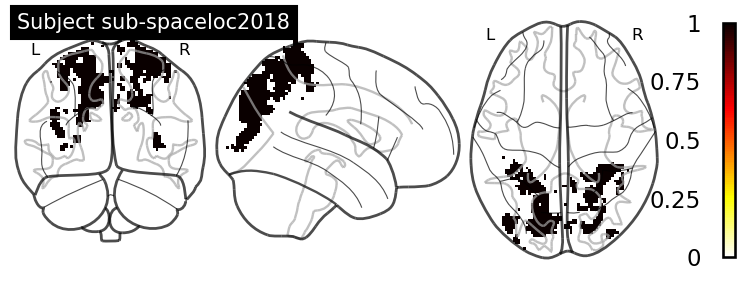

In [30]:
# plot tools cope - 3 = voxel activation for one subject, it's binary. 
import numpy as np
import nibabel as nib
from nilearn import plotting

# Get reference affine/header
first_sub = sub_info['sub'].iloc[0]
zstat_reg = image.load_img(f'{raw_dir}/{first_sub}/ses-01/derivatives/fsl/toolloc/HighLevel{suf}.gfeat/cope3.feat/stats/zstat1_reg.nii.gz')

for idx, sub in enumerate(sub_info['sub']):
   sub_dir = f'{raw_dir}/{sub}/ses-01'
   neural_map_path = f'{sub_dir}/derivatives/neural_map/tool_binary_3d.npy'
   
   if os.path.exists(neural_map_path):
       binary_map = np.load(neural_map_path)
       nii_img = nib.Nifti1Image(binary_map, zstat_reg.affine, zstat_reg.header)
       
       display = plotting.plot_glass_brain(nii_img,
                                         display_mode='ortho',
                                         colorbar=True,
                                         title=f'Subject {sub}')
       plt.show()